## 🎧 Cocktail Party Problem with ICA — Google Colab Demo

### 🔍 What is This Notebook?

This notebook demonstrates the **Cocktail Party Problem** using **Independent Component Analysis (ICA)**. You will simulate multiple voice-like signals, mix them (like microphone recordings at a noisy party), and use ICA to recover the original signals — all in Python.

---

### 🎯 Objectives

* Understand the **Cocktail Party Problem** in signal processing.
* Learn how to simulate mixed audio signals.
* Apply **FastICA** from `scikit-learn` to separate overlapping sources.
* Visualize and **listen** to the original, mixed, and recovered signals.

---

### 📦 Dependencies

This notebook uses:

* `numpy` for numerical operations
* `matplotlib` for plotting
* `sklearn` for applying ICA
* `soundfile` for writing WAV files
* `IPython.display.Audio` for playback inside Colab

You don’t need to install anything manually — everything runs inside Colab.

---

### ▶️ How to Use

1. Run all cells in order.
2. View the plotted waveforms for:

   * Original simulated signals
   * Mixed signals (microphone input)
   * Recovered signals (after ICA)
3. Listen to each version using in-browser audio playback.

---

In [1]:
!pip install soundfile --quiet

In [2]:
# Step 1: Install dependencies


# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import soundfile as sf
from IPython.display import Audio

In [4]:
# Step 3: Generate simulated voice-like signals (sine waves + square waves)
def generate_signals(duration=5, sample_rate=2000):
    t = np.linspace(0, duration, duration * sample_rate)
    
    s1 = np.sin(2 * np.pi * 55 * t)       # Simulated voice 1
    s2 = np.sign(np.sin(2 * np.pi * 110 * t))  # Simulated voice 2 (square wave)
    
    S = np.c_[s1, s2]
    S /= S.std(axis=0)  # Normalize
    return S, t

S, t = generate_signals()

In [5]:
# Step 4: Mix the signals (like microphone recordings)
A = np.array([[1, 0.5], [0.5, 1]])  # Mixing matrix
X = S @ A.T  # Mixed signals

In [6]:
# Step 5: Apply ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Recovered signals
A_est = ica.mixing_        # Estimated mixing matrix

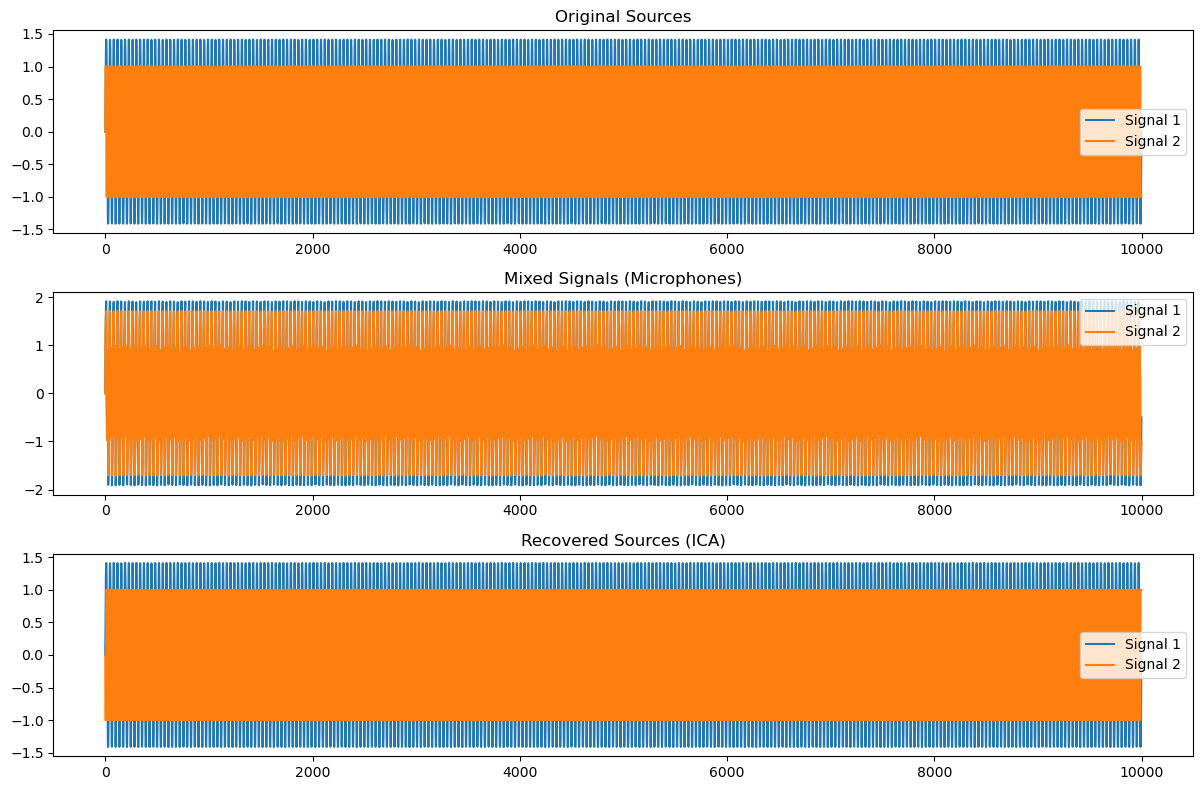

In [7]:
# Step 6: Plot original, mixed, and separated signals
plt.figure(figsize=(12, 8))

for i, (title, data) in enumerate(zip(
        ['Original Sources', 'Mixed Signals (Microphones)', 'Recovered Sources (ICA)'],
        [S, X, S_])):
    plt.subplot(3, 1, i+1)
    plt.title(title)
    plt.plot(data[:, 0], label='Signal 1')
    plt.plot(data[:, 1], label='Signal 2')
    plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Step 7: Save and play audio files
sf.write('original1.wav', S[:, 0], 2000)
sf.write('original2.wav', S[:, 1], 2000)
sf.write('mixed1.wav', X[:, 0], 2000)
sf.write('mixed2.wav', X[:, 1], 2000)
sf.write('recovered1.wav', S_[:, 0], 2000)
sf.write('recovered2.wav', S_[:, 1], 2000)

print("🔊 Original Signals")
display(Audio('original1.wav'))
display(Audio('original2.wav'))

print("🎤 Mixed Microphone Signals")
display(Audio('mixed1.wav'))
display(Audio('mixed2.wav'))

print("✅ Recovered Signals (ICA)")
display(Audio('recovered1.wav'))
display(Audio('recovered2.wav'))

🔊 Original Signals


🎤 Mixed Microphone Signals


✅ Recovered Signals (ICA)
